In [17]:
import math
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np

# Численные методы

## 1. Численное дифференцирование

Q: В каких случаях используется численное вычисление производной?  
A: Вычисление производных численными методами имеет смысл, либо в случае, когда аналитическое вычисление производной невозможно, либо в случае, когда аналитическое выражение неизвестно и функция задана набором точек.

### 1.1 Методы односторонней разности

Производная функции $f(x)$ определяется выражением:

$$f'(x_{0}) = \frac{df}{dx} = \lim_{dx\to0}\frac{f(x_{0} + dx) - f(x_{0})}{dx}$$

Заменяя $dx$ на конечную величину $\Delta x$, которая называется шагом дифференцирования, получаем выражение:

$$f'(x_{0}) = \frac{f(x_{0} + \Delta x) - f(x_{0})}{\Delta x}$$

В случае, когда дифференцируемая функция задана в виде непрерывной функции, то для вычисления значения дифференциала необходимо получить значение функции $f(x)$ в точке $x_{0}$ и в точке $x_{0}+\Delta x$. После этого можно вычислить значение производной функции $f'(x)$.

<img src="images/function_diff.jpg" />

Если функция задана выборкой, то есть набором значений функции в точках, то выражение для численного дифференцирования (при условии, что x образуют возрастающую последовательность) можно переписать в виде:

$$f'_{i} = \frac{f_{i+1}-f_{i}}{x_{i+1}-x_{i}}$$

<img src="images/function_diff_discr.jpg" />

Как видно из этих выражений, значение производной в точке $x_{i}$ оценивается по значению функции в этой и в следующей точке $x_{i+1}$. Такой способ можно условно назвать **правосторонней разностью**. Нетрудно записать выражение для **левосторонней разности**:

$$f'(x_{0}) = \frac{f(x_{0}) - f(x_{0} - \Delta x)}{\Delta x}$$

или

$$f'_{i} = \frac{f_{i}-f_{i-1}}{x_{i}-x_{i-1}}$$


### 1.2 Метод двусторонней разности

С точки зрения точности методы левосторонней и правосторонней разностей равнозначны. Более точное значение дает метод двусторонней разности (что особенно справедливо для гладких функций). Теорема Лагранжа говорит о том, что уравнение:

$$f'(x_{0}) = \frac{f(b) - f(a)}{b-a}$$

(при условии, что $[a,b]$ – замкнутый промежуток, на котором функция $f(x)$ дифференцируема) имеет по меньшей мере один корень $x=\zeta$. Значение этого корня, вообще говоря, зависит от вида функции $f(x)$. Если она квадратичная, то уравнение первой степени и его корень лежит в точности на середине отрезка $[a,b]$, то есть:

$$\zeta = \frac{b + a}{2}$$

Если $a$ имеет постоянное значение, а $b$ стремится к $a$, то один из корней, как правило (за исключением случаев, когда вторая производная $f''(a)$ равна нулю или не существует), стремится к середине отрезка, то есть $\lim_{b\to a} \frac{\zeta - a}{b - a} = \frac{1}{2}$ . Поэтому более точное приближение к искомому значению производной функции в точке $x_{0}$ можно получить, воспользовавшись формулами двусторонней разности:

$$f'(x_{0}) = \frac{f(x_{0} + \Delta x) - f(x_{0} - \Delta x)}{2\cdot{\Delta x}}$$

или, для функций заданных в виде выборки:

$$f'_{i} = \frac{f_{i+1}-f_{i-1}}{x_{i+1}-x_{i-1}}$$

Наглядно  сравнить  одностороннюю  и  двустороннюю  разности  можно представив производную, как  тангенс угла наклона касательной к функции в точке $x_{i}$. На рисунке точное значение производной обозначено как $\tan a_{1}$. В методе  односторонней  разности вместо  касательной  проводится прямая через точки $x_{i}$ и $x_{i+1}$. Если в окрестностях точки $x_{i}$ функция не гладкая, то значение производной ($\tan a_{2}$) будет существенно отличаться от точного. В то время как  в  методе двусторонней разности, проведя прямую через точки $x_{i-1}$  и  $x_{i+1}$, можно получить значение производной практически совпадающее с точным.

<img src="images/function_diff_two.jpg" />

### 1.3 Частное дифференцирование функции многих переменных


Отдельно  следует  отметить  случай  численного  определения  частных дифференциалов функций многих переменных. В этом случае все аргументы функции  становятся константами  кроме аргумента,  по которому проводится дифференцирование,  а  требуемый  порядок производной  получается  путем последовательного вычисления производных, вплоть до требуемого порядка:

$$\frac{df}{dx_{i}} = \frac{f(...,x_{i} + \Delta x_{i},...) - f(...,x_{i},...)}{\Delta x_{i}}$$

### 1.4 Производные высоких порядков

При  вычислении  производных  высоких  порядков  производная  (n)-го порядка   считается   первой   производной   от   (n-1)-го порядка.   Так   вторая производная функции является первой производной от первой производной:

$f''(x) = (f'(x))'$    или    $\frac{d^{2}f}{dx^{2}} = \frac{d}{dx}(\frac{df}{dx})$

Тогда выражение для вычисления производной примет вид:

$$\frac{d^{2}f}{dx^{2}} = \frac{d}{dx}(\frac{df}{dx}) = \frac{f'_{1} - f'_{-1}}{2\Delta x} = \frac{\frac{f'_{2} - f'_{0}}{2\Delta x} - \frac{f'_{0} - f'_{-2}}{2\Delta x}}{2\Delta x} =\frac{f'_{2} - 2f'_{0} + f'_{-2}}{(2\Delta x)^{2}}$$

### Задание:
#### Реализовать расчет производной для заданной функции в точке из интервала $[x_{0}, x_{1}]$, построить её график

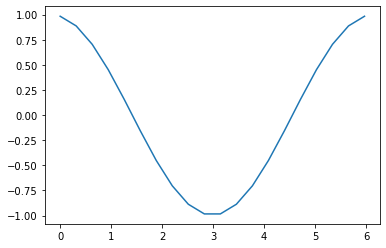

In [18]:
def f(s,e,n):
    x = []
    y = []
    t = (e - s)/n
    while s < e:
        x.append(s)
        y.append((math.sin(s + t) - math.sin(s))/t)
        s += t
    plt.plot(x,y)
f(0,2*math.pi,20)

## 2. Численное интегрирование

Q: В каких случаях применяется численное интегрирование?  
A: Численное интегрирование применяется, когда:  
- сама подынтегральная функция не задана аналитически, а например, представлена в виде таблицы значений
- аналитическое представление подынтегральной функции известно, но её первообразная не выражается через аналитические функции

### 2.1 Задача численного интегрирования

В ряде задач возникает необходимость вычисления определенного интеграла от некоторой функции:

$$I = \int_{a}^{b} f(x)dx$$

где $f(x)$ – подынтегральная функция, непрерывная на отрезке $[a,b]$.
Геометрический смысл интеграла заключается в том, что если $f(x) \geq 0$ на отрезке $[a,b]$, то интеграл $\int_{a}^{b} f(x)dx$ численно равен площади фигуры, ограниченной графиком функции $y = f(x)$, отрезком оси абсцисс, прямой $x = a$ и прямой $x = b$. Таким образом, вычисление интеграларавносильно вычислению площади криволинейной трапеции.

<img src="images/function_int.jpg" />

Задача численного интегрирования состоит в замене исходной подынтегральной функции некоторой аппроксимирующей функцией (обычно полиномом).

Способы численного вычисления определенных интегралов основаны на замене интеграла конечной суммой:

$$\int_{a}^{b} f(x)dx \approx \sum_{j=1}^{N} c_{j}\cdot{f(x_{j})}$$

где $c_{j}$ – числовые коэффициенты, выбор которых зависит от выбранного метода численного интегрирования, $x_{j}$ – узлы интегрирования $(x_{j} \in [a,b], j = 1,...,N )$. Выражение называют квадратурной формулой.

Разделим отрезок $[a,b]$ на $N$ равных частей, то есть на $N$ элементарных отрезков. Длина каждого элементарного отрезка:

$$h = \frac{b - a}{N}$$

Тогда значение интеграла можно представить в виде:

$$\int_{a}^{b} f(x)dx \approx \sum_{j=1}^{N} \int_{x_{j-1}}^{x_{j}} f(x)dx$$

Из этого выражения видно, что для численного интегрирования на отрезке $[a,b]$, достаточно построить квадратурную формулу на каждом частичном отрезке $[x_{j-1}, x_{j}]$.

Погрешность квадратурной формулы определяется выражением:

$$\Psi_{N} = \int_{a}^{b} f(x)dx - \sum_{j=1}^{N} c_{j}\cdot{f(x_{j})}$$

и зависит от выбора коэффициентов $c_{j}$ и от расположения узлов $x_{j}$.

Погрешность численного интегрирования определяется шагом разбиения. Уменьшая этот шаг, можно добиться большей точности. Однако
увеличивать число точек не всегда возможно. Если функция задана в табличном виде, приходится ограничиваться заданным множеством точек. Повышение точности может быть в этом случае достигнуто за счет повышения степени используемых интерполяционных многочленов.

**Формулы Ньютона-Котеса** получаются путем замены подынтегральной функции интерполяционным многочленом Лагранжа с разбиением каждого частичного отрезка интегрирования на n равных частей. Получившиеся формулы используют значения подынтегральной функции в узлах интерполяции и являются точными для всех многочленов степени х зависящей от числа узлов. Точность решения растет с увеличением степени интерполяционного многочлена.

**Метод Гаусса** не предполагает разбиения отрезка интегрирования на равные промежутки. Формулы численного интегрирования интерполяционного типа ищутся таким образом, чтобы они обладали наивысшим порядком точности при заданном числе узлов. Узлы и коэффициенты формул численного интегрирования находятся из условий обращения в нуль их остаточных членов для всех многочленов максимально высокой степени.

### 2.2 Методы Ньютона-Котеса

#### Метод прямоугольников

Одним из простейших методов численного интегрирования является метод прямоугольников. На частичном отрезке $[x_{j-1}, x_{j}]$ подынтегральную функцию заменяют полиномом Лагранжа нулевого порядка, построенным в одной точке. В качестве этой точки можно выбрать середину частичного отрезка $x_{j-0.5} = x_{j} - 0.5h$ . Тогда значение интеграла на частичном отрезке:

$$\int_{x_{j-1}}^{x_{j}} f(x)dx \approx f(x_{j-0.5})\cdot{h}$$

Подставив это выражение в $\int_{a}^{b} f(x)dx \approx \sum_{j=1}^{N} \int_{x_{j-1}}^{x_{j}} f(x)dx$, получим составную формулу **средних прямоугольников**:

$$\int_{a}^{b} f(x)dx \approx \sum_{j=1}^{N} f(x_{j-0.5})\cdot{h}$$

Графическая иллюстрация метода средних прямоугольников представлена на риcунке. Из него видно, что площадь криволинейной трапеции приближенно заменяется площадью многоугольника, составленного из $N$ прямоугольников. Таким образом, вычисление определенного интеграла сводится к нахождению суммы N элементарных прямоугольников.
Предыдущую формулу можно представить в ином виде:

$$\int_{a}^{b} f(x)dx \approx \sum_{j=1}^{N} f(x_{j-1})\cdot{h}$$ или $$\int_{a}^{b} f(x)dx \approx \sum_{j=1}^{N} f(x_{j})\cdot{h}$$

Эти формулы называются формулой **левых и правых прямоугольников соответственно**. Графически метод левых и правых прямоугольников представлен на рисунке. Однако из-за нарушения симметрии в формулах правых и левых прямоугольников, их погрешность значительно больше, чем в методе средних прямоугольников.

<img src="images/integrate_rect.jpg" />

### Задание:
#### Реализовать вычисление интеграла методом прямоугольников

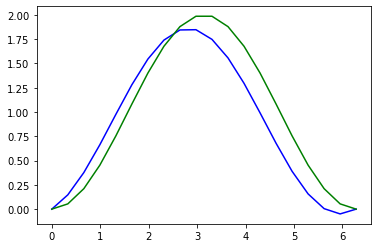

In [25]:
n = 20
s = 0
e = 2*math.pi
x = np.linspace(s, e, n)
t = (e-s)/n
integral = np.zeros(n, float) 
for i in range(1,n):
    il[i] = il[i-1] + np.sin(x[i]+t/2)*t
plt.plot(x, il,'b')
plt.plot(x, -np.cos(x)+1, "g")
plt.show()

#### Метод трапеций

Если на частичном отрезке $[x_{j-1}, x_{j}]$ подынтегральную функцию заменить полиномом Лагранжа первой степени:

$$f(x) = L_{1, j}(x) = \frac{1}{h}[(x-x_{j-1})f(x_{j})-(x-x_{j})f(x_{j-1})]$$

то искомый интеграл на частичном отрезке запишется следующим образом:

$$\int_{x_{j-1}}^{x_{j}} f(x)dx \approx \frac{1}{h} [f(x_{j})\int_{x_{j-1}}^{x_{j}}(x-x_{j-1})dx - f(x_{j-1})\int_{x_{j-1}}^{x_{j}}(x-x_{j})dx] = \frac{f(x_{j-1}) + f(x_{j})}{2}h$$

Тогда составная формула трапеций на всем отрезке интегрирования $[a,b]$ примет вид:

$$\int_{a}^{b} f(x)dx \approx \sum_{j=1}^{N} \frac{f(x_{j}) + f(x_{j-1})}{2}h = h[\frac{1}{2}(f_{1} + f_{N}) + f_{2} + ... + f_{N-1}]$$

Графически метод трапеций представлен на рисунке. Площадь криволинейной трапеции заменяется площадью многоугольника, составленного из $N$ трапеций, при этом кривая заменяется вписанной в нее ломаной. На каждом из частичных отрезков функция аппроксимируется прямой, проходящей через конечные значения, при этом площадь трапеции на каждом отрезке определяется по формуле.

Погрешность метода трапеций выше, чем у метода средних прямоугольников. Однако на практике найти среднее значение на элементарном интервале можно только у функций, заданных аналитически (а не таблично), поэтому использовать метод средних прямоугольников удается далеко не всегда.

<img src="images/integrate_trapezium.jpg" />

### Задание:
#### Реализовать вычисление интеграла методом трапеции

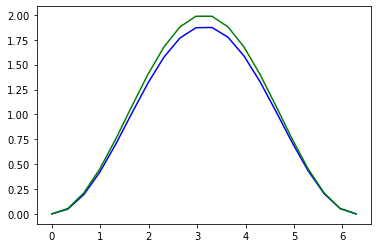

In [20]:
x = np.linspace(e, s, n)
il = np.zeros(n, float) 
t = (s-e)/n
for i in range(1,n):
    il[i] = il[i-1] + (np.sin(x[i]-t)+np.sin(x[i]))*t/2
plt.plot(x, il,'b')
plt.plot(x, -np.cos(x)+1,'g')
plt.show()

#### Метод Симпсона

В этом методе подынтегральная функция на частичном отрезке $[x_{j-1}, x_{j}]$ аппроксимируется параболой, проходящей через три точки $x_{j-1}$, $x_{j-0.5}$, $x_{j}$, то есть интерполяционным многочленом Лагранжа второй степени:

$$f(x)=L_{2,j}(x)=\frac{2}{h^2}[(x-x_{j-0.5})(x-x_{j})f(x_{j-1})-2\cdot{(x-x_{j-1})(x-x_{j})f(x_{j-0.5})}+(x-x_{j-1})(x-x_{j-0.5})f(x_{j})]$$

Проведя интегрирование, получим:

$$\int_{x_{j-1}}^{x_{j}}f(x)dx \approx \frac{h}{6}(f_{j-1}+4f_{j-0.5}+f_{j})$$

Это и есть формула Симпсона или формула парабол. На отрезке $[a,b]$ формула Симпсона примет вид:

$$\int_{a}^{b}f(x)dx \approx \frac{h}{6}[f_{0} + f_{N}+2(f_{1}+f_{2}+...+f_{N-1})+4(f_{0.5}+f_{1.5}+f_{2.5}+...+f_{N-0.5})]=\frac{h}{6}[f_{0}+f_{N}+2\sum_{j=1}^{N-1} f_{j} + 4\sum_{j=0.5}^{N-0.5} f_{j}]$$

Если разбить отрезок интегрирования $[a,b]$ на четное количество $2N$ равных частей с шагом $h=\frac{b-a}{2N}$ , то можно построить параболу на каждом сдвоенном частичном отрезке $[x_{j-1}, x_{j}]$ и переписать выражения без дробных индексов. Тогда формула Симпсона примет вид:

$$\int_{a}^{b}f(x)dx \approx \frac{h}{3}[f_{0} + f_{2N}+2(f_{2}+f_{4}+...+f_{2N-2})+4(f_{1}+f_{3}+f_{5}+...+f_{2N-1})]=\frac{h}{3}[f_{0}+f_{2N}+2\sum_{j=2,2}^{2N-2} f_{j} + 4\sum_{j=1,2}^{2N-1} f_{j}]$$

Графическое представление метода Симпсона показано на рисунке. На каждом из сдвоенных частичных отрезков заменяем дугу данной кривой параболой.

<img src="images/integrate_simpson.jpg" />

### Задание:
#### Реализовать вычисление интеграла методом Симпсона

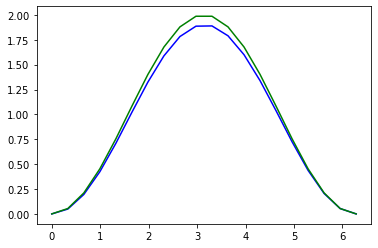

In [23]:
x = np.linspace(e, s, n)
t = (s-e)/n
il = np.zeros(n, float)
for i in range(1,n):
    il[i] = il[i-1] + (np.sin(x[i]-t)+np.sin(x[i])+4*np.sin(x[i]-t/2))*t/6
plt.plot(x, il, 'b')
plt.plot(x, -np.cos(x)+1, 'g')
plt.show()

#### Семейство методов Ньютона-Котеса

Выше были рассмотрены три схожих метода интегрирования функций – метод прямоугольников, метод трапеций, метод Симпсона. Их объединяет общая идея: интегрируемая функция интерполируется на отрезке интегрирования по равноотстоящим узлам многочленом Лагранжа, для которого аналитически вычисляется значение интеграла. Семейство методов, основанных на таком подходе, называется **методами Ньютона-Котеса**.

В выражении $\int_{a}^{b} f(x)dx \approx \sum_{j=1}^{N} c_{j}\cdot{f(x_{j})}$ коэффициенты $c_{j}$ правильнее называть **весовыми коэффициентами**. Величину $\Psi_{N} = \int_{a}^{b} f(x)dx - \sum_{j=1}^{N} c_{j}\cdot{f(x_{j})}$, определяющую погрешность численного интегрирования, называют **остатком**.
Для семейства методов Ньютона-Котеса можно записать общее выражение:

$$\int_{a}^{b} f(x)dx \approx \frac{n\cdot{h}}{C_{n}}\sum_{j=1}^{N}\sum_{i=0}^{n}c_{in}f(x_{i})$$

где $n$ – порядок метода Ньютона-Котеса, $N$ – количество частичных отрезков, $h=\frac{x_{j}-x_{j-1}}{n}$, $C_{n} = \sum_{i=0}^{n} c_{in}$, $x_{i}=x_{j} + i\cdot{h}$.

Из выражения легко можно получить формулу прямоугольников для $n=0$, формулу трапеций для $n = 1$, и формулу Симпсона для $n=2$. Коэффициенты $c_{in}$ могут быть заданы в табличной форме.

*Таблица:  Весовые коэффициенты метода Ньютона-Котеса*

<img src="images/newton_kotes.jpg" />

### Задание
#### Вычислить интеграл заданной функции на отрезке всеми тремя способами, построить её график и сравнить результаты вычисления.

In [22]:
#already done

## Задачи с начальными условиями для систем обыкновенных дифференциальных уравнений
Рассмотрим задачу Коши для системы обыкновенных дифференциальных уравнений

$$\tag{1} \frac{d u_i}{d t} = f_i (t, u_1, u_2, \ldots, u_n), \quad t > 0$$

$$\tag{2} u_i(0) = u_i^0, \quad i = 1, 2, \ldots, m.$$

Используя векторные обозначения, задачу $(1), (2)$ можно записать как задачу Коши

$$\tag{3} \frac{d \pmb{u}}{d t} = \pmb{F}(t, \pmb{u}), \quad t > 0,$$ 
$$\tag{4} \pmb{u}(0) = \pmb{u}_0$$

В задаче Коши необходимо по известному решению в точке $t=0$ необходимо найти из уравнения $(3)$ решение при других $t$.

### Численные методы решения задачи Коши
Существует большое количество методов численного решения задачи $(3), (4)$. Вначале рассмотрим простейший явный метод Эйлера и его программную реализацию. Затем будут представлены методы Рунге—Кутта и многошаговые методы.

При построении численных алгоритмов будем считать, что решение этой дифференциальной задачи существует, оно единственно и обладает необходимыми свойствами гладкости.

Идея численных методов решения задачи $(3), (4)$ состоит из четырех частей:

1. Вводится расчетная сетка по переменной $t$ (время) из $N_t+1$ точки $t_0, t_1, …, t_{N_{t}}$. Нужно найти значения неизвестной функции $\pmb{u}$ в узлах сетки $t_n$. Обозначим через $\pmb{y}^n$ приближенное значение $\pmb{u}(t_n)$.

2. Предполагаем, что дифференциальное уравнение выполнено в узлах сетки.

3. Аппроксимируем производные конечными разностями.

4. Формулируем алгоритм, который вычисляет новые значения $\pmb{y}^{n+1}$ на основе предыдущих вычисленных значений $\pmb{y}^k, k<n$.

Метод сходится в точке $t_n$ , если $|\pmb{y}^n−\pmb{u}(t_n)|→0$ при $τ→0$. Метод имеет $p$-ый порядок точности, если $|\pmb{y}^n−\pmb{u}(t_n)|=O(τ^p), p>0$ при $τ→0$.

### Явный метод Эйлера
Проиллюстрируем указанные шаги. Для начала введем расчетную сетку. Очень часто сетка является равномерной, т.е. имеет одинаковое расстояние между узлами $tn$ и $tn+1$:

$$\omega_\tau = \{ t_n = n \tau, n = 0, 1, \ldots, N_t \}.$$

Затем, предполагаем, что уравнение выполнено в узлах сетки, т.е.:

$$\pmb{u}^\prime (t_n) = \pmb{F}(t_n, u(t_n)), \quad t_n \in \omega_\tau.$$

Заменяем производные конечными разностями. С этой целью, нам нужно знать конкретные формулы, как производные могут быть аппроксимированы конечными разностями. Простейший подход заключается в использовании определения производной:

$$\pmb{u}^\prime(t) = \lim_{\tau \to 0} \frac{\pmb{u}(t+\tau) - \pmb{u}(t)}{\tau}.$$

В произвольном узле сетки tn это определение можно переписать в виде:

$$\pmb{u}^\prime(t_n) = \lim_{\tau \to 0} \frac{\pmb{u}(t_n+\tau) - \pmb{u}(t_n)}{\tau}.$$

Вместо того, чтобы устремлять шаг сетки к нулю, мы можем использовать малый шаг τ, который даст численное приближение $u′(t_n)$:

$$\pmb{u}^\prime(t_n) \approx \frac{\pmb{u}^{n+1} - \pmb{u}^{n}}{\tau}.$$

Такая аппроксимация известна как разностная производная вперед и имеет первый порядок по $τ$, т.е. $O(τ)$. Теперь можно использовать аппроксимацию производной. Таким образом получим явный метод Эйлера:

$$\tag{5} \frac{\pmb{y}^{n+1} - \pmb{y}^n}{\tau} = \pmb{F}(t_n, \pmb{y}^{n}).$$

Четвертый шаг заключается в получении численного алгоритма. Из $(5)$ следует, что мы должны знать значение $y_n$ для того, чтобы решить уравнение $(5)$ относительно $y^{n+1}$ и получить формулу для нахождения приближенного значения искомой функции на следующем временном слое $t_{n+1}$:

$$\tag{6} \pmb{y}^{n+1} = \pmb{y}^n + \tau \pmb{F}(t_n, \pmb{y}^{n})$$

При условии, что у нас известно начальное значение $\pmb{y}^0=\pmb{u}_0$, мы можем использовать $(6)$ для нахождения решений на последующих временных слоях.

### Задание
#### Реализовать явный метод Эйлера

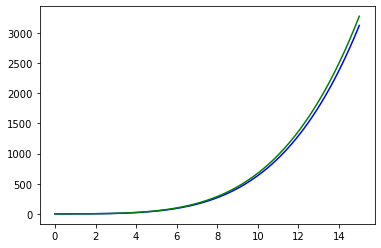

In [27]:
s = 0
e = 15
t = 0.1
n = int((e-s)/0.1)
x = np.linspace(s, e, n)
y = np.zeros(n, float)
y[0] = 1.0
for i in range(1,n):
    y[i] = y[i-1] + t*x[i-1]*np.sqrt(y[i-1])   

plt.plot(x, y , 'b')
plt.plot(x, (x**2 + 4)**2/16, 'g')
plt.show()

### Неявный метод Эйлера
При построении неявного метода Эйлера значение функции $F$ берется на новом временном слое, т.е. для решении задачи $(5)$ используется следующий метод:

$$\tag{7} \frac{\pmb{y}^{n+1} - \pmb{y}^n}{\tau} = \pmb{F}(t_{n+1}, \pmb{y}^{n+1}).$$

Таким образом для нахождения приближенного значения искомой функции на новом временном слое $t_{n+1}$ нужно решить нелинейное уравнение относительно $\pmb{y}^{n+1}$:

$$\tag{8} \pmb{y}^{n+1} - \tau \pmb{F}(t_{n+1}, \pmb{y}^{n+1}) - y^n = 0.$$

Для решения уравнения $(8)$ можно использовать, например, метод Ньютона.

### Задание
#### Реализовать неявный метод Эйлера

### Методы Рунге—Кутта
Одношаговый метод Рунге—Кутта в общем виде записывается следующим образом:

$$\tag{9} \frac{\pmb{y}^{n+1} - \pmb{y}^n}{\tau} = \sum_{i = 1}^s b_i \pmb{k}_i,$$

где

$$\tag{10} \pmb{k}_i = \pmb{F}\left( t_n + c_i\tau, \pmb{y}^n + \tau \sum_{j=1}^s a_{ij}\pmb{k}_j\right), \quad i = 1, 2, \ldots, s.$$

Формула $(9)$ основана на $s$ вычислениях функции $\pmb{F}$ и называется $s$-стадийной. Если $a_{ij}=0$ при $j≥i$ имеем явный метод Рунге—Кутта. Если $a_{ij}=0$ при $j>i$ и $a_{ii}≠0$, то $\pmb{k}_i$ определяется неявно из уравнения

$$\tag{11} \pmb{k}_i = \pmb{F}\left( t_n + c_i\tau, \pmb{y}^n + \tau \sum_{j=1}^{i-1} a_{ij}\pmb{k}_j + \tau a_{ii} \pmb{k}_i \right), \quad i = 1, 2, \ldots, s.$$

О таком методе Рунге—Кутта говорят как о диагонально-неявном.

Одним из наиболее распространенных является явный метод Рунге-Кутта четвертого порядка:

$$\tag{12} \pmb{k}_1 = \pmb{F}(t_n, \pmb{y}^n), \quad \pmb{k}_2 = \pmb{F}\left( t_n + \frac{\tau}{2}, \pmb{y}^n + \tau \frac{\pmb{k}_1}{2} \right),\\ 
\pmb{k}_3 = \pmb{F}\left( t_n + \frac{\tau}{2}, \pmb{y}^n + \tau
\frac{\pmb{k}_2}{2} \right), \quad
\pmb{k}_4 = \pmb{F}\left( t_n + \tau, \pmb{y}^n + \tau \pmb{k}_3 \right),\\ 
\frac{\pmb{y}^{n+1} -\pmb{y}^n}{\tau} = \frac{1}{6} (\pmb{k}_1 + 2\pmb{k}_2 + 2\pmb{k}_3
+ \pmb{k}_4)\\
t_{n+1} = t_n + \tau$$

### Задание
#### Реализовать метод Рунге-Кутты 4 порядка для случая $y'(t) = t\sqrt{y(t)}$ с начальными условиями $t_0=0, \ y_0=y(t_0)=y(0)=1$, $t=0,\ldots,10,\ \delta t = \tau=0.1$ и сравнить все значения $y$ с точным решением $y(t)=\frac{1}{16}(t^2+4)^2$.

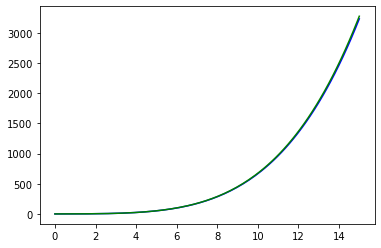

In [32]:
x = np.linspace(s, e, n)
def g(x,y):
    return x*np.sqrt(y)
for i in range(1,n):
    k1 = g(x[i-1], y[i-1])
    k2 = g(x[i-1] + t/2, y[i-1] + t*k1/2)
    k3 = g(x[i-1] + t/2, y[i-1] + t*k2/2)
    k4 = g(x[i-1] + t, y[i-1] + t*k3)
    y[i] = y[i-1] + t*(k1+2*k2+2*k3+k4)/6   

plt.plot(x, y , 'b')
plt.plot(x, (x**2 + 4)**2/16, 'g')
plt.show()

### Многошаговые методы
В методах Рунге—Кутта в вычислениях участвуют значения приближенного решения только в двух соседних узлах $\pmb{y}^n$ и $\pmb{y}^{n+1}$ — один шаг по переменной $t$. Линейный $m$-шаговый разностный метод записывается в виде

$$\tag{13} \frac{1}{\tau} \sum_{i=0}^m a_i \pmb{y}^{n+1-i} = \sum_{i=0}^{m} b_i \pmb{F}(t_{n+1-i}, \pmb{y}^{n+1-i}), \quad n = m-1, m, \ldots$$

Вариант численного метода определяется заданием коэффициентов $a_i, b_i, i=0,1,…,m$, причем $a_0≠0$. Для начала расчетов по рекуррентной формуле $(13)$ необходимо задать $m$ начальных значений $\pmb{y}^0, \pmb{y}^1, …, \pmb{y}^{m−1}$ (например, можно использовать для их вычисления метод Эйлера).

Различные варианты многошаговых методов (методы Адамса) решения задачи с начальными условиями для систем обыкновенных дифференциальных уравнений могут быть получены на основе использования квадратурных формул для правой части равенства

$$\tag{14} \pmb{u}(t_{n+1}) - \pmb{u}(t_n) = \int_{t_n}^{t_{n+1}} \pmb{F}(t, \pmb{u}) dt$$

Для получения неявного многошагового метода используем для подынтегральной функции интерполяционную формулу по значениям функции $\pmb{F}^{n+1} = \pmb{F}(t_{n+1}, \pmb{y}^{n+1}), \pmb{F}^n, \ldots, \pmb{F}^{n+1-m}$ , т.е.

$$\tag{15} \frac{\pmb{y}^{n+1} - \pmb{y}^n}{\tau} = \sum_{i=0}^{m} b_i \pmb{F}(t_{n+1-i}, \pmb{y}^{n+1-i})$$

Для интерполяционного метода Адамса $(15)$ наивысший порядок аппроксимации равен $m+1$.

Для построения явных многошаговых методов можно использовать процедуру экстраполяции подынтегральной функции в правой части $(14)$. В этом случае приближение осуществляется по значениям $\pmb{F}^n,\pmb{F}^{n-1}, \ldots, \pmb{F}^{n+1-m}$ и поэтому

$$\tag{16} \frac{\pmb{y}^{n+1} - \pmb{y}^n}{\tau} = \sum_{i=1}^{m} b_i \pmb{F}(t_{n+1-i}, \pmb{y}^{n+1-i})$$

Для экстраполяционного метода Адамса $(16)$ погрешность аппроксимации имеет $m$-ый порядок.

Примерами методов Адамса $(15), (16)$ при $m=3$ являются

$$\tag{17} \frac{\pmb{y}^{n+1} - \pmb{y}^n}{\tau} = \frac{1}{24}(9\pmb{F}^{n+1} + 19\pmb{F}^{n} - 5\pmb{F}^{n-1} + \pmb{F}^{n-2}),$$
$$\tag{18} \frac{\pmb{y}^{n+1} - \pmb{y}^n}{\tau} = \frac{1}{12}(23\pmb{F}^{n}-16\pmb{F}^{n-1} + 5\pmb{F}^{n-2}),$$

соответственно.

На основе методов Адамса строятся и схемы предиктор–корректор. На этапе предиктор используется явный метод Адамса, на этапе корректора — аналог неявного метода Адамса. Например, при использовании методов третьего порядка аппроксимации в соответствии с $(18)$ для предсказания решения положим

$$\frac{\pmb{y}^{n+1} - \pmb{y}^n}{\tau} = \frac{1}{12} (23 \pmb{F}^{n}-16\pmb{F}^{n-1} + 5\pmb{F}^{n-2}).$$

Для уточнения решения (см. $(17)$) используется схема

$$\frac{\pmb{y}^{n+1} - \pmb{y}^n}{\tau} = \frac{1}{24} (9\pmb{F}^{n+1} + 19\pmb{F}^{n} - 5\pmb{F}^{n-1} + \pmb{F}^{n-2}).$$

Аналогично строятся и другие классы многошаговых методов.